In [25]:
#instalamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib

In [26]:
sales_files_import = pd.read_csv("C:\\Users\\pesparza\\Desktop\\Curso Python\\Files\\2022-09-22.csv")


In [27]:
#seleccionamos las columnas que nos interesan
df = sales_files_import[['Create_Date','NumeroPedido','Fecha','Hora','Cliente','Material','Stock','Sugerido','Venta','Peso','Precio','Tipo','Motivo','Region','Sucursal','Ruta']]
#calculamos falta de stock
df['StockXSugerido'] = df['Stock']-df['Sugerido']
#filtramos por los registros donde no se tuvo stock y lo vemos por region
dfNegativo=df[df["StockXSugerido"] <0]

C:\Users\pesparza\Anaconda3\envs\python_fundamentals\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
#funciona para seleccionar una region del catalogo
def selectRegion():
    print("Esribe la region que quieres analizar")
    regiones = dfNegativo['Region'].unique()
    print(regiones)
    region = input().upper()
    return region in regiones, region


In [29]:
#funciona para seleccionar una sucursal del catalogo
def selectSucursal():
    print("Esribe la sucursal que quieres analizar")
    sucursales = dfNegativoRegion['Sucursal'].unique()
    print(sucursales)
    sucursal = input().upper()
    return sucursal in sucursales, sucursal


In [30]:
#funciona para seleccionar una ruta del catalogo
def selectRuta():
    print("Esribe la ruta que quieres analizar")
    rutas = dfNegativoRegionSuc['Ruta'].unique()
    print(rutas)
    ruta = int(input())
    print(ruta in rutas)
    return ruta in rutas, ruta


In [31]:
#funciona para mostrar el resultado del analisis a nivel region

def analisisRegion(region):
    print("Fuera de Stock para la region: " + region)
    df = dfNegativo[dfNegativo['Region']==region]
    ax = df['Material'].value_counts().sort_values(ascending=False).head(10).plot(kind="pie", title="Materiales Fuera de stock en una region")
    pieReg = df['Material'].value_counts()
    pieReg.head(5)

In [32]:
#funciona para mostrar el resultado del analisis a nivel sucursal

def analisisSucursal(region, sucursal):
    print("Fuera de Stock para la region: " + region  + " y sucursal: " + sucursal)
    df1 = dfNegativo[dfNegativo['Region']==region]
    df = df1[df1['Sucursal']==sucursal]
    ax = df['Material'].value_counts().sort_values(ascending=False).head(10).plot(kind="pie", title="Materiales Fuera de stock en una region-sucursal")
    pieReg = df['Material'].value_counts()
    pieReg.head(5)

In [33]:
#funciona para mostrar el resultado del analisis a nivel ruta

def analisisRuta(region, sucursal, ruta):
    print("Fuera de Stock para la region: " + region  + ", sucursal: " + sucursal + " y ruta: " +  str(ruta))
    df1 = dfNegativo[dfNegativo['Region']==region]
    df2 = df1[df1['Sucursal']==sucursal]
    df = df2[df2['Ruta']==ruta]
    ax = df['Material'].value_counts().sort_values(ascending=False).head(10).plot(kind="pie", title="Materiales Fuera de stock en una region-sucursal-ruta")
    pieReg = df['Material'].value_counts()
    pieReg.head(5)

Quieres ver el analisis a nivel Region, Sucursal o Ruta?
1 = Region
2 = Sucursal
3 = Ruta
1
Esribe la region que quieres analizar
['SUR' 'CTO' 'OCC' 'NTE' nan]
CTO
Fuera de Stock para la region: CTO


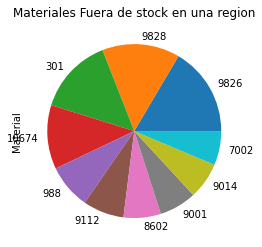

In [41]:
#funciona para correr el programa

print("Quieres ver el analisis a nivel Region, Sucursal o Ruta?") #preguntamos por el analisis que se quiere hacer
print("1 = Region")
print("2 = Sucursal")
print("3 = Ruta")
analisis = int(input())

while((analisis>3) or (analisis<1)):
    print("Quieres ver el analisis a nivel Region, Sucursal o Ruta?")
    print("1 = Region")
    print("2 = Sucursal")
    print("3 = Ruta")
    analisis = int(input())
#analisis por region
if(analisis == 1):
    region = False
    while(not(region)):
        region, regionSeleccionada = selectRegion()
    dfNegativoRegion = dfNegativo[dfNegativo['Region']==regionSeleccionada]
    analisisRegion(regionSeleccionada)
#analisis por sucursal
if(analisis == 2):
    region = False
    while(not(region)):
        region, regionSeleccionada = selectRegion()
    dfNegativoRegion = dfNegativo[dfNegativo['Region']==regionSeleccionada]
    sucursal = False
    while(not(sucursal)):
        sucursal, sucursalSeleccionada = selectSucursal()
    dfNegativoRegionSuc = dfNegativoRegion[dfNegativoRegion['Sucursal']==sucursalSeleccionada]
    analisisSucursal(regionSeleccionada,sucursalSeleccionada)
#analisis por ruta
if(analisis == 3):
    region = False
    while(not(region)):
        region, regionSeleccionada = selectRegion()
    dfNegativoRegion = dfNegativo[dfNegativo['Region']==regionSeleccionada]
    sucursal = False
    while(not(sucursal)):
        sucursal, sucursalSeleccionada = selectSucursal()
    dfNegativoRegionSuc = dfNegativoRegion[dfNegativoRegion['Sucursal']==sucursalSeleccionada]
    ruta = False
    while(not(ruta)):
        ruta, rutaSeleccionada = selectRuta()
    analisisRuta(regionSeleccionada,sucursalSeleccionada,rutaSeleccionada)
